In [5]:
import pandas as pd 
from os.path import join
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_dir = join('..', 'Data')
files = !ls $data_dir

# Naive approach

Bunch of plots with behavioral data. Raw (black line) and gaussian blured (with different sigma values)

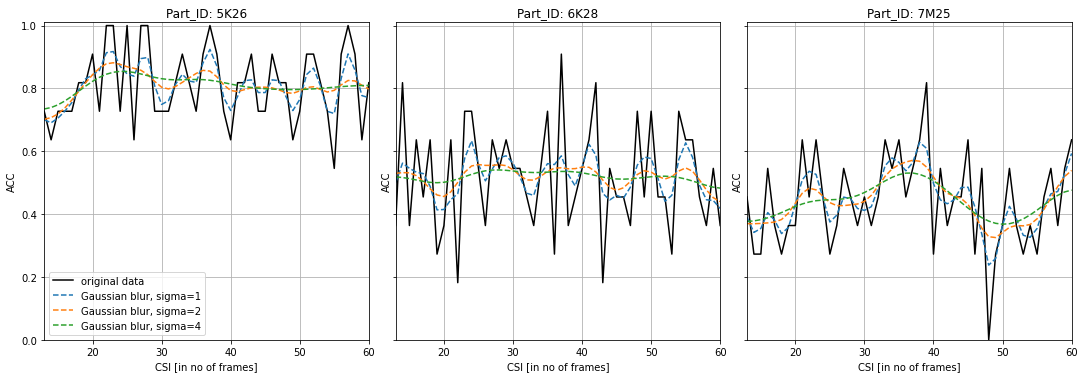

In [7]:
fig, axs = plt.subplots(len(files)//3, 3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for idx, f in enumerate(files):
    data = pd.read_csv(join(data_dir, f))
    data["Block_no"] = 0
    assert data.shape[0] == 590
    for i in list(range(11)): # add block no
        data[50*i + 40:50*(i+1) + 40].Block_no = i+1

    original_data = data.query("Trial_type != 'training'").groupby("CSI").mean().Corr
    axs[idx].plot(original_data, 'k', label='original data')
    for sigma in [1, 2, 4]:
        axs[idx].plot(list(range(13,61)), gaussian_filter1d(original_data, sigma), '--', label=f'Gaussian blur, sigma={sigma}')
    axs[idx].set_title("Part_ID: " + f.split('_')[0])
    axs[idx].set_ylabel("ACC")
    axs[idx].set_xlabel("CSI [in no of frames]")
    axs[idx].set_xlim([13,60])
    axs[idx].set_ylim([0,1.01])
    axs[idx].grid()
    if idx % 3 == 0:
        axs[idx].legend()

    # plt.savefig(f"{f}.png")
# fix.legend()
fig.show()